## [167. Two Sum II - Input array is sorted](https://leetcode.com/problems/two-sum-ii-input-array-is-sorted/)

问题难度: &clubs;

### 问题描述

给定一个**升序排列**的整数数组, 找到两个数使得它们相加得到指定的值,

函数`twoSum`需要返回符合条件的两个数的下标, 并且前面的下标必须小于后面的下标.

**注意**

- 返回的答案下标不要从`0`开始
- 可以假设每个输入*有且仅有*一个解决方案, 并且不能同时使用*相同*的元素

**示例**

```
Input: numbers = [2,7,11,15], target = 9
Output: [1,2]
解释: 2 和 7 的和为 9. 因此 index1 = 1, index2 = 2.
```

### 解题思路

使用两个指针(`head, tail`)分别指向数组的首尾两个元素:
当`head<tail`时:
- 当`numbers[head] + numbers[tail] == target`时, 返回`head+1, tail+1`
- 当`numbers[head] + numbers[tail] < target`时, 说明头部元素需要向右移动, `head = head+1`
- 当`numbers[head] + numbers[tail] > target`时, 说明尾部元素需要向做移动, `tail = tail-1`

不难得到此时的时间复杂度为`O(n)`

### 代码

In [14]:
class Solution(object):
    def twoSum(self, numbers, target):
        """
        :type numbers: List[int]
        :type target: int
        :rtype: List[int]
        """
        head, tail = 0, len(numbers) - 1
        while head < tail:
            now_sum = numbers[head] + numbers[tail]
            if now_sum == target:
                return [head+1, tail+1]
            elif now_sum < target:
                head += 1
            else:
                tail -= 1
        return None

In [15]:
s = Solution()
numbers = [2,7,11,15]
target = 9
print(s.twoSum(numbers, target))

[1, 2]


## [168. Excel Sheet Column Title](https://leetcode.com/problems/excel-sheet-column-title/)

问题难度: &clubs;

### 问题描述

给定一个正整数, 返回其在`Excel`表格中对应的列名称.

例如:
```
    1 -> A
    2 -> B
    3 -> C
    ...
    26 -> Z
    27 -> AA
    28 -> AB 
    ...
```
**示例1**
```
Input: 1
Output: "A"
```

**示例2**
```
Input: 28
Output: "AB"
```

**示例3**
```
Input: 701
Output: "ZY"
```

### 解题思路

查阅示例, 可以看出`1-26`直接对应`A-Z`,那么接下来呢? 找规律:

```
   27 / 26 = 1 -> A 27 % 26 = 1 -> A
   28 / 26 = 1 -> A 28 % 26 = 2 -> B
```

这样就找到规律了, 如果当前数值大于`26`那么就迭代, 使用其与`26`的商和余数继续拼接. 这里需要注意一个地方: 当整数是`26`的倍数的时候, 不应该使用商进行迭代, 而应该是商减去`1`, 然后余数直接设置为`26`即可.


### 代码


In [11]:
class Solution(object):
    
    mark = [chr(i+ord('A')) for i in range(26)]
    
    def convertToTitle(self, n):
        """
        :type n: int
        :rtype: str
        """
        if n > 0 and n <= len(self.mark):
            return self.mark[n-1]
        left = int(n / len(self.mark))
        right = n % len(self.mark)
        if right == 0:
            left -= 1
            right = len(self.mark)
        return self.convertToTitle(left) + self.convertToTitle(right)

In [12]:
s = Solution()
n = 52
print(s.convertToTitle(n))

AZ


## [169. Majority Element](https://leetcode.com/problems/majority-element/)

问题难度: &clubs;

### 问题描述

给定一个长度为`n`的数组, 找到数组中的主要元素. 主要元素为出现次数**超过**[`n/2`]的元素.

可以假设数组非空并且数组中总是存在一个主要元素.

**示例1**
```
Input: [3,2,3]
Output: 3
```

**示例2**
```
Input: [2,2,1,1,1,2,2]
Output: 2
```

### 解题思路

最直观的想法, 遍历数组, 然后存储每个元素的出现次数, 如果出现次数超过`n/2`,直接返回该元素即可. 时间复杂度为`O(n)`.


### 代码

In [ ]:
class Solution(object):
    def majorityElement(self, nums):
        """
        :type nums: List[int]
        :rtype: int
        """
        num_dict = dict()
        for num in nums:
            cnt = 1
            if num in num_dict:
                cnt += num_dict[num]
            if cnt > len(nums)/2:
                return num
            num_dict[num] = cnt

In [7]:
s = Solution()
nums = [3,2,3]
print(s.majorityElement(nums))
nums = [2,2,1,1,1,2,2]
print(s.majorityElement(nums))

3
2


## [170. Two Sum III - Data structure design](https://leetcode.com/problems/two-sum-iii-data-structure-design/)

问题难度: &clubs;

### 问题描述

设计并实现一个`TwoSum`的类, 它应该支持以下两个操作: `add`和`find`.

- `add`: 向内部的数据结构中增加一个数
- `find`: 找到是否存在一个数字对使得它们的和等于给定的值

例如:
```
add(1); add(3); add(5); 
find(4) -> true 
find(7) -> false
```

### 解题思路

使用一个`dict`来存储数据, 用来记录数字出现的次数, `add()`的时候直接更新次数即可, `find`时遍历`dict`, 针对每个`num`, 判断`target-num`是否在`dict`中, 如果在, 则返回`true`,否则返回`false`. 如果出现`num = target - num`的情况, 判断其次数是否大于`1`即可.

### 代码

In [1]:
class TwoSum(object):

    def __init__(self):
        """
        initialize your data structure here
        """
        self.data_dict = dict()

    def add(self, number):
        """
        Add the number to an internal data structure.
        :rtype: nothing
        """
        cnt = 1
        if number in self.data_dict:
            cnt += self.data_dict[number]
        self.data_dict[number] = cnt

    def find(self, value):
        """
        Find if there exists any pair of numbers which sum is equal to the value.
        :type value: int
        :rtype: bool
        """
        for number in self.data_dict:
            target = value - number
            if target == number:
                # 判断出现次数是否大于1
                if self.data_dict[target] > 1:
                    return True
            else:
                # 判断是否存在
                if target in self.data_dict:
                    return True
        return False

In [3]:
# Your TwoSum object will be instantiated and called as such:
twoSum = TwoSum()
twoSum.add(1)
twoSum.add(3)
twoSum.add(5)
print(twoSum.find(4))
print(twoSum.find(7))

True
False


## [171. Excel Sheet Column Number](https://leetcode.com/problems/excel-sheet-column-number/)

问题难度: &clubs; 

### 问题描述

给定一个`Excel`表格中出现的列名, 返回其对应的列数.

例如:

```
    A -> 1
    B -> 2
    C -> 3
    ...
    Z -> 26
    AA -> 27
    AB -> 28 
    ...
```

**示例1**
```
Input: "A"
Output: 1
```
**示例2**
```
Input: "AB"
Output: 28
```
**示例3**
```
Input: "ZY"
Output: 701
```
### 解题思路

这道题目应该是第`168`题的镜像题目. `A-Z`的就不用说了, 直接找对应关系即可, 当列名长度超过`1`时, 找一下规律:

```
 AB -- A=1 B=2 AB=A*26+B=28
 ZY -- Z=26 Y=25 ZY=Z*26+Y=701
 ABA -- A=1 B=2 A=1 AAB=A*26*26+B*26+A=729
```
不难发现, 在前面的数需要乘以26的倍数, 这样, 代码也写出来了.

### 代码

In [10]:
class Solution(object):
    
    def titleToNumber(self, s):
        """
        :type s: str
        :rtype: int
        """
        # 初始化映射关系
        char_dict = dict()
        for i in range(26):
            char_dict[chr(i+ord('A'))] = i + 1
        #遍历列名
        num, base = 0, 1
        for i in range(len(s)):
            char_idx = len(s) - i - 1
            char = s[char_idx]
            num += char_dict[char] * base
            base = base * 26
        return num
        

In [9]:
sl = Solution()

title = "A"
print(sl.titleToNumber(title))

title = "ZY"
print(sl.titleToNumber(title))

title = "ABA"
print(sl.titleToNumber(title))

title = "AZ"
print(sl.titleToNumber(title))

1
701
729
52


## [172. Factorial Trailing Zeroes](https://leetcode.com/problems/factorial-trailing-zeroes/)

问题难度: &clubs;

### 问题描述

给定一个整数`n`, 返回`n!`结果中末尾`0`的数目.

**示例1**
```
Input: 3
Output: 0
解释: 3! = 6, 结尾没有0.
```

**示例2**
```
Input: 5
Output: 1
解释: 5! = 120, 结尾有1个0.
```

**注意**: 我们的时间复杂度最好控制在 `logarithmic` 内.

### 解题思路

这道题目需要求末尾的`0`的个数, 分析一下, 只有乘积为`10`才会累计末尾的`0`, 哪些数的乘积可能为`10`: `2 * 5`, `10`, 分析一下:

- 当`n<5`时, 输出肯定为`0`
- 当`5 <= n < 10`时, 输出为`1`
- 当`10 <= n < 5`时, 输出为`2`

...

所以最后只需要统计`2`和`5`的个数即可. 出现了`5`必定会出现`2`, 因此只需要统计出现`5`的次数即可. 例如`28`中出现了`25`,`20`,`15`,`10`,`5`, 其中`25 = 5 * 5`, 应该要算`2`个.

### 代码


In [1]:
class Solution(object):
    def trailingZeroes(self, n):
        """
        :type n: int
        :rtype: int
        """
        count = 0
        while n > 0:
            count += n/5
            n /= 5
        return count

## [173. Binary Search Tree Iterator](https://leetcode.com/problems/binary-search-tree-iterator/)

问题难度: &clubs; &clubs; &clubs;

### 问题描述

实现一个二叉搜索树的迭代器. 迭代器将会使用树的根节点进行初始化. 调用`next()`将会返回`BST`中下一个最小值.

**示例**
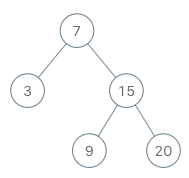

```
BSTIterator iterator = new BSTIterator(root);
iterator.next();    // return 3
iterator.next();    // return 7
iterator.hasNext(); // return true
iterator.next();    // return 9
iterator.hasNext(); // return true
iterator.next();    // return 15
iterator.hasNext(); // return true
iterator.next();    // return 20
iterator.hasNext(); // return false
```

**注意**:
- `next()` 和 `hasNext()` 的时间复杂度应该控制在平均`O(1)`的条件下以及使用`O(h)` 的内存, 其中`h` 是树的高度.
- 可以假设`next()` 的调用是有效的, 也就是说, 当调用`next()`函数时至少有一个下一个最小的数.

### 解题思路

这道题目其实看成考察的树的遍历, 将检索二叉树使用栈的形式存储数字的从小到大排列, 然后再`pop`出去, 因此其实是一个中序遍历.

In [2]:
# Definition for a binary tree node.
# class TreeNode(object):
#     def __init__(self, x):
#         self.val = x
#         self.left = None
#         self.right = None

class BSTIterator(object):

    def __init__(self, root):
        """
        :type root: TreeNode
        """
        self.stack = []
        while root:
            self.stack.append(root)
            root = root.left
        

    def next(self):
        """
        @return the next smallest number
        :rtype: int
        """
        tmp = self.stack.pop()
        right = tmp.right
        while right:
            self.stack.append(right)
            right = right.left
        return tmp.val
        

    def hasNext(self):
        """
        @return whether we have a next smallest number
        :rtype: bool
        """
        return len(self.stack) > 0
        


# Your BSTIterator object will be instantiated and called as such:
# obj = BSTIterator(root)
# param_1 = obj.next()
# param_2 = obj.hasNext()